Численное решение уравнения движения заряженной частицы в электромагнитом поле. 

Решение дифференциального уравнения $\vec{F} = m\vec{a} = q\vec{E} + q[\vec{V},\vec{B}]$ производиться с помошью метода Рунге-Кутта 4-го порядка. В качестве заряженной частицы выбирается положительно заряженная частица с зарядом 0.1 Кл и массой 0.1 кг. Поле считается однородным и стационарным. Еденица измерения - СИ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def func(u, a, E, B):
    force = [
        E[0] + u[1]*B[2] - B[1]*u[2],
        E[1] - u[0]*B[2] + B[0]*u[2],
        E[2] + u[0]*B[1] - B[0]*u[1],
    ]
    f = np.zeros(6)
    f[0] = u[3]
    f[1] = u[4]
    f[2] = u[5]
    
    f[3] = a*force[0]
    f[4] = a*force[1]
    f[5] = a*force[2]
    return f



In [3]:
t0 = 0.; T = 10

x0 = 0.; y0 = 0.; z0 = 0.

vx0 = 0.691; vy0 = 0.59; vz0 = 0.



B = [0.61, 0.0, 0.0]
E = [0., 0.51, 0.0]

q = 0.1; mass = 0.1
a = q / mass

M = T*10
tau = (T - t0) / M
t = np.linspace(t0, T, M + 1)

u = np.zeros((M + 1, 6))
u[0,0] = x0; u[0,1] = y0; u[0,2] = z0
u[0,3] = vx0; u[0,4] = vy0; u[0,5] = vz0

for m in range(M):
    w_1 = func(u[m], a, E, B)
    w_2 = func(u[m] + tau*1/2*w_1, a, E, B)
    w_3 = func(u[m] + tau*1/2*w_2, a, E, B)
    w_4 = func(u[m] + tau*w_3, a, E, B)
    u[m + 1] = u[m] + tau*(1/6*w_1 + 1/3*w_2 + 1/3*w_3 + 1/6*w_4)

Text(0.5, 0.98, 'Trajectory')

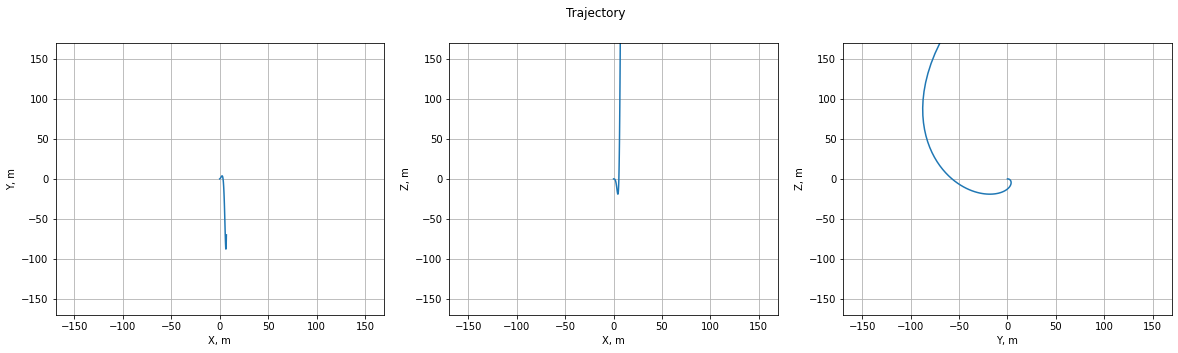

In [4]:
x = u[:,0]
y = u[:,1]
z = u[:,2]
m0, m1 = np.min([x, y, z]), np.max([x, y, z])

fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 5))
ax.plot(x, y)
ax.set_xlabel('X, m'); ax.set_ylabel('Y, m'); ax.grid(1)
ax.set_xlim((-m1,m1)); ax.set_ylim((-m1,m1))

ax1.plot(x, z)
ax1.set_xlabel('X, m'); ax1.set_ylabel('Z, m'); ax1.grid(1)
ax1.set_xlim((-m1,m1)); ax1.set_ylim((-m1,m1))

ax2.plot(y, z)
ax2.set_xlabel('Y, m'); ax2.set_ylabel('Z, m'); ax2.grid(1)
ax2.set_xlim((-m1,m1)); ax2.set_ylim((-m1,m1))

plt.suptitle('Trajectory')

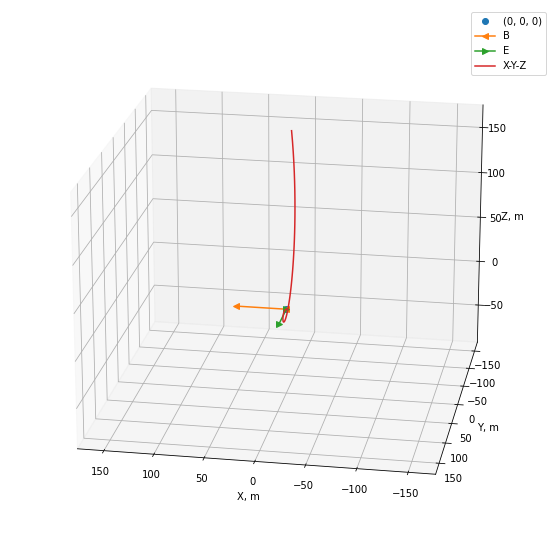

In [5]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d', elev=20, azim=100)
ax.plot([x0], [y0], [z0], 'o', label='(0, 0, 0)')
ax.plot([x0, B[0]*m1/2], [y0, B[1]*m1/2], [z0, B[2]*m1/2], '-<',label='B')
ax.plot([x0, E[0]*m1/2], [y0, E[1]*m1/2], [z0, E[2]*m1/2], '->', label='E')

ax.plot(x, y, z, label='X-Y-Z')
ax.set_xlabel('X, m'); ax.set_ylabel('Y, m'); ax.set_zlabel('Z, m')
ax.set_xlim((-m1,m1)); ax.set_ylim((-m1,m1)); ax.set_zlim((m0,m1))
ax.legend()

Полученные графики, выражающие траекторию движения заряженной частицы, движущейся в скрещенных магнитном и электрическим полях, согласуються с мниманическими плравилами "буравчика" или "правилом винта".